In [18]:
import numpy as np
import looped_docstr as ld
from gpu_mandelbrot import plot_gpu

# Docstrings

For examples of docstrings, see the following functions:

In [ ]:
ld.mandelbrot()
ld.plot_naive()
plot_gpu()

# Unit testing with Unittesting
Unit testing for the naive implementation in the [looped_docstr.py](looped_docstr.py) file has been included in [test_mandelbrot.py](test_mandelbrot.py) for 7 test cases:

In [1]:
%run test_mandelbrot.py

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


# OpenCL Kernel Implementation

The kernel used in the [OpenCL implementation](gpu_mandelbrot.py), is defined as follows:

```
#include <pyopencl-complex.h>
__kernel void mandelbrot(
    __global const cfloat_t *C,
    __global       ushort *n,
             const ushort MAX_ITER)
    {
        int gid = get_global_id(0);
        cfloat_t Z;
        Z.real = 0;
        Z.imag = 0;
        n[gid] = 0;

        while(Z.real*Z.real + Z.imag*Z.imag <= 4 && n[gid] < MAX_ITER)
        {
            cfloat_t Z_mul = cfloat_mul(Z,Z);
            Z = cfloat_add(Z_mul, C[gid]);
            n[gid]++;
        }
    }
```

## Memory types
The kernel has 3 parameters; C is the complex mesh, which is READ_ONLY, and therefore defined as a const. n is the iterations array, which is also READ_ONLY and a const for the same reason. Lastly, MAX_ITER is the maximum number of iterations to do for one element of C. This is also READ_ONLY and defined as a const.
Both C and n are stored in global memory, as they are too large to fit in local memory, and the GPU would run out of resources.
n and MAX_ITER are stored in ushort - one element of n can never be larger than MAX_ITER and therefore the two should have the same type. ushort was chosen as the default value for MAX_ITER is 80.


To test that the kernel is working, a plotting function is available:

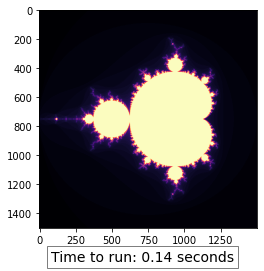

In [19]:
plot_gpu(1500, 1500, 0)

# Testing Compute Devices
## Dedicated Graphics Card

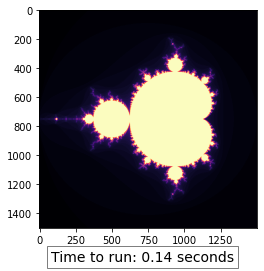

In [17]:
plot_gpu(1500, 1500, 0)

## On-board Graphics Card (CPU's GPU)

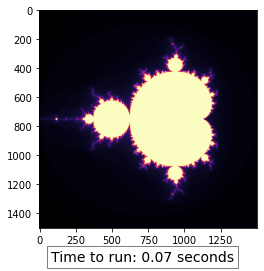

In [20]:
plot_gpu(1500, 1500, 1)

As can be seen above, the on-board graphics seems to be much faster than the dedicated graphics card, however this does not correlate with the results from running the file.

It appears that in jupyter the function runs much faster...

My results from running the file are:

#### Dedicated GPU
0.36 seconds

#### On-board GPU
0.67 seconds